In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\DIU\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.read_csv(r"C:\Users\DIU\Desktop\Banknote authentication.csv")

In [3]:
dataset.head()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,entropy_image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.describe()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,entropy_image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance_wavelet    1372 non-null float64
skewness_wavelet    1372 non-null float64
curtosis_wavelet    1372 non-null float64
entropy_image       1372 non-null float64
class               1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
dataset.isnull().sum()

variance_wavelet    0
skewness_wavelet    0
curtosis_wavelet    0
entropy_image       0
class               0
dtype: int64

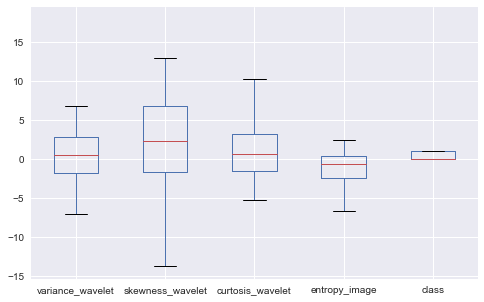

In [7]:
plt.subplots(figsize=(8,5))
dataset.boxplot()

In [8]:
X = dataset.iloc[:, :-1]

In [9]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = pd.DataFrame(data=scaler.transform(X), columns=X.columns)

In [10]:
scaled_features.head()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,entropy_image
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


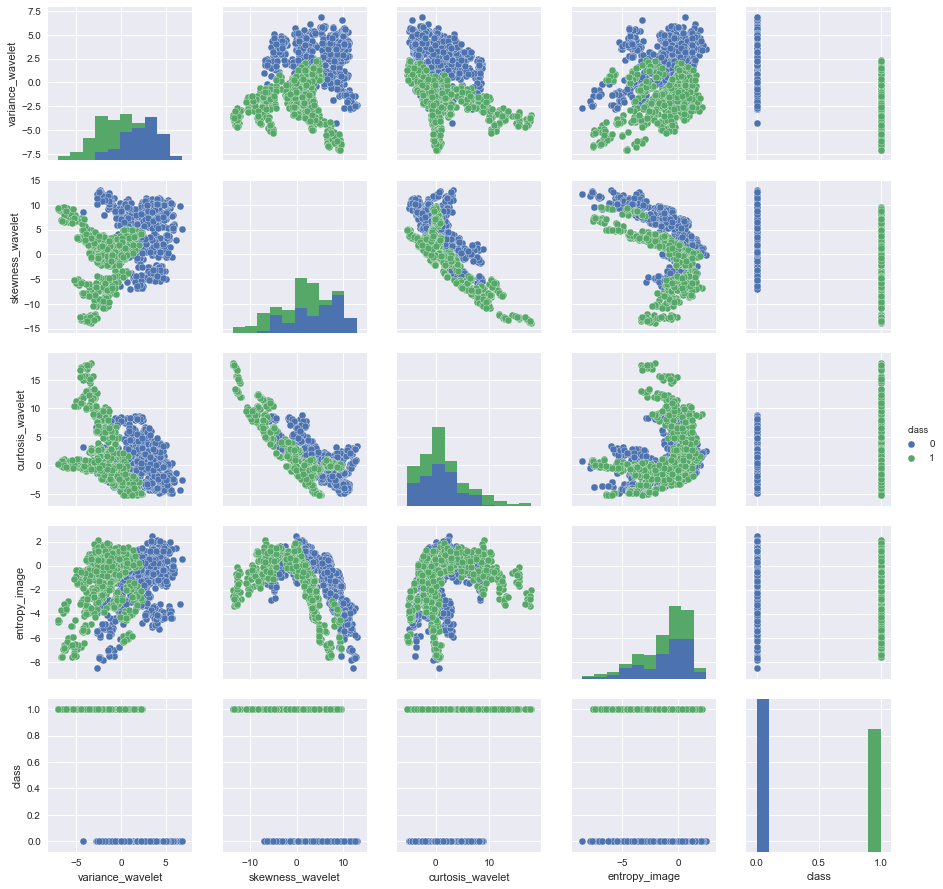

In [11]:
sns.pairplot(data = dataset, hue="class")

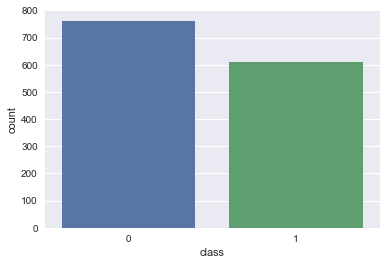

In [12]:
sns.countplot(x = "class", data=dataset)

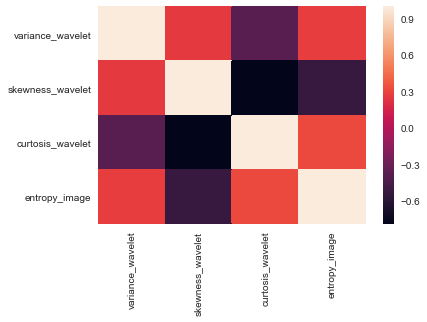

In [13]:
sns.heatmap(X.corr())

In [14]:
class_map = {0 : "Forged", 1 : "Authentic"}
dataset["class"] = dataset["class"].map(class_map)

y = dataset["class"]
y = pd.get_dummies(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
learning_rate = 0.01
training_epochs = 100
batch_size = 100

In [17]:
n_hidden_1 = 4 
n_hidden_2 = 4 
n_input = 4 
n_classes = 2 
n_samples = X_train.shape[0]

In [18]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [19]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [20]:
def multilayer_perceptron(x, weights, biases):
    
    '''
    x: Placeholder for data input
    weights: Dictionary of weights
    biases: Dictionary of biases
    
    '''
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    
    return out_layer

In [21]:
preds = multilayer_perceptron(x, weights, biases)

In [22]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=preds))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [23]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
costs = []
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for batch in range(total_batch):
        batch_x = X_train[batch*batch_size : (1+batch)*batch_size]
        batch_y = y_train[batch*batch_size : (1+batch)*batch_size]
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
    costs.append(avg_cost)
    
print("Model has completed {} epochs of training.".format(training_epochs))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 1 cost=6.4764
Epoch: 2 cost=2.8384
Epoch: 3 cost=1.1005
Epoch: 4 cost=0.6135
Epoch: 5 cost=0.4975
Epoch: 6 cost=0.4558
Epoch: 7 cost=0.4170
Epoch: 8 cost=0.3865
Epoch: 9 cost=0.3644
Epoch: 10 cost=0.3467
Epoch: 11 cost=0.3330
Epoch: 12 cost=0.3233
Epoch: 13 cost=0.3177
Epoch: 14 cost=0.3148
Epoch: 15 cost=0.3139
Epoch: 16 cost=0.3125
Epoch: 17 cost=0.3114
Epoch: 18 cost=0.3108
Epoch: 19 cost=0.3102
Epoch: 20 cost=0.3096
Epoch: 21 cost=0.3090
Epoch: 22 cost=0.3085
Epoch: 23 cost=0.3079
Epoch: 24 cost=0.3077
Epoch: 25 cost=0.3072
Epoch: 26 cost=0.3072
Epoch: 27 cost=0.3069
Epoch: 28 cost=0.3068
Epoch: 29 cost=0.3067
Epoch: 30 cost=0.3066
Epoch: 31 cost=0.3066
Epoch: 32 cost=0.3065
Epoch: 33 cost=0.3063
Epoch: 34 cost=0.3064
Epoch: 35 cost=0.3062
Epoch: 36 cost=0.3061
Epoch: 37 cost=0.3061
Epoch: 38 cost=0.3060
Epoch: 39 cost=0.3061
Epoch: 40 cost=0.3059
Epoch: 41 cost=0.3062
Epoch: 42 cost=0.3060
Epoch: 43 c

In [24]:
correct_predictions = tf.cast(tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1)), tf.float32)

In [25]:
accuracy = tf.reduce_mean(correct_predictions)
print("Accuracy:", accuracy.eval(feed_dict={x: X_test, y: y_test}))

Accuracy: 0.9927273


In [26]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)

In [27]:
print(classification_report(y_test, preds_rfc))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       127
          1       0.99      0.99      0.99       148

avg / total       0.99      0.99      0.99       275



In [28]:
print(confusion_matrix(y_test.values.argmax(axis=1), preds_rfc.argmax(axis=1)))

[[125   2]
 [  1 147]]


In [29]:
accuracy_score(y_test, preds_rfc)

0.9890909090909091